In [1]:
# SVM Example

# Using Breast Cancer datasets
# from UCIrvine data repository (archive.ics.uci.edu/ml/datasets.html)
import numpy as np
from sklearn import preprocessing, neighbors, svm
from sklearn.model_selection import train_test_split # for cross_validation
import pandas as pd

In [2]:
df = pd.read_csv('breast-cancer-wisconsin.data')
df.replace('?', -99999, inplace=True) # making a huge outlier in place of a missing datapoint
df.drop(['id'], 1, inplace=True)

X = np.array(df.drop(['class'],1))
y = np.array(df['class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

C:\Users\mahva\AppData\Local\Temp/ipykernel_9596/3132182235.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(['id'], 1, inplace=True)
C:\Users\mahva\AppData\Local\Temp/ipykernel_9596/3132182235.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = np.array(df.drop(['class'],1))


In [3]:
# Defining the classifier
clf = svm.SVC()
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)
print(accuracy)

0.6214285714285714


In [4]:
# Prediction
example_measures = np.array([[4,2,1,1,1,2,3,2,1],[4,2,1,2,2,2,3,2,1]])
example_measures = example_measures.reshape(len(example_measures), -1)
prediction = clf.predict(example_measures)
print(prediction)

[2 2]


In [13]:
# Building SVM algorithm FROM SCRATCH
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
style.use('ggplot')

In [28]:
class Support_Vector_Machine:
    def __init__(self, visualization = True):
        self.visualization = visualization
        self.colors = {1:'r', -1:'b'} #class of 1 will be in red, and class of -1 will be in blue
        if self.visualization:
            self.fig = plt.figure()
            self.ax = self.fig.add_subplot(1,1,1) # grid of 1,1, and the first plot
    
    #train, minimize mmagnitude of w, and maximize b
    def fit(self, data): # optomization part of it, to determine w and b.
        self.data = data
        opt_dict = {} # a dictionary with key of magnitude of w and the value of a list of w and b, {||w|| : [w,b]}
        
        transforms = [[1,1],
                      [-1,1],
                      [-1,-1],
                      [1,-1]]
        
        all_data = []
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)
                    
        self.max_feature_value = max(all_data)
        self.min_feature_value = min(all_data)
        all_data = None
        
        step_sizes = [self.max_feature_value*0.1,
                      self.max_feature_value*0.01,
                      self.max_feature_value*0.001] # more gets more expensive
        
        b_range_multiple = 5 # extremely expensive, b does not need to be veery precise as w.
        b_multiple = 5 # making the step for b bigger than w. less important
        latest_optimum = self.max_feature_value*10
        
        # stepping process
        for step in step_sizes:
            w = np.array([latest_optimum, latest_optimum])
            optimized = False
            while not optimized:
                for b in np.arange(-1*(self.max_feature_value*b_range_multiple),
                                   self.max_feature_value*b_range_multiple, 
                                   step*b_multiple):
                    for transformation in transforms:
                        w_t = w*transformation
                        found_option = True
                        for i in self.data:
                            for xi in self.data[i]:
                                yi = i
                                if not yi*(np.dot(w_t,xi)+b) >= 1: #yi(xi.w+b) >= 1
                                    found_option = False
                        if found_option:
                            opt_dict[np.linalg.norm(w_t)] = [w_t, b]
                            
                if w[0] < 0:
                    optimized = True
                    print('optimized a step')
                else:
                    w = w - step
            norms = sorted([n for n in opt_dict])
            opt_choice = opt_dict[norms[0]]
            self.w = opt_choice[0]
            self.b = opt_choice[1]
            latest_optimum = opt_choice[0][0]+step*2

    # Prediction
    def predict(self, features):
        classification = np.sign(np.dot(np.array(features), self.w) + self.b) # sign(x.w+b)
        if classification != 0 and self.visualization:
            self.ax.scatter(features[0], features[1], s = 200, marker = '*', c = self.colors[classification])
        return classification
    
    def visualize(self):
        [[self.ax.scatter(x[0], x[1], s = 100, color = self.colors[i]) for x in data_dict[i]] for i in data_dict]
        def hyperplane(x,w,b, v):
            #hyperplane = x.w+b = v 
            #positive v = 1, negative v = -1, decision boundary v = 0
            return (-w[0]*x-b+v) / w[1]
        datarange = (self.min_feature_value*0.9, self.max_feature_value*1.1)
        hype_x_min = datarange[0]
        hype_x_max = datarange[1]
        
        # positive support vector hyperplane
        # x.w+b = 1
        psv1 = hyperplane(hype_x_min, self.w, self.b, 1)
        psv2 = hyperplane(hype_x_max, self.w, self.b, 1)
        self.ax.plot([hype_x_min, hype_x_max], [psv1, psv2], 'k')
            
        # negative support vector hyperplane
        # x.w+b = -1
        nsv1 = hyperplane(hype_x_min, self.w, self.b, -1)
        nsv2 = hyperplane(hype_x_max, self.w, self.b, -1)
        self.ax.plot([hype_x_min, hype_x_max], [nsv1, nsv2], 'k')
        
        # decision boundary hyperplane
        # x.w+b = 0
        db1 = hyperplane(hype_x_min, self.w, self.b, 0)
        db2 = hyperplane(hype_x_max, self.w, self.b, 0)
        self.ax.plot([hype_x_min, hype_x_max], [db1, db2], 'g--')
        
        plt.show()

data_dict = {-1:np.array([[1,7],
                         [2,8],
                         [3,8]]),
             
             1:np.array([[5,1],
                         [6,-1],
                         [7,3]])}

optimized a step
optimized a step
optimized a step


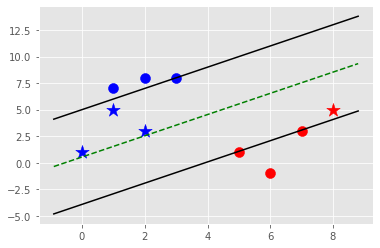

In [34]:
svm = Support_Vector_Machine()
svm.fit(data = data_dict)
# making predictions
predict_us = [[0,1], [1,5], [2,3], [8,5]]
for p in predict_us:
    svm.predict(p)
svm.visualize()